In [90]:
import pandas as pd
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt

In [91]:
#making it less work to read all files by saving the file_paths in a dictionary
import os

data = {}

directory = os.path.join("c:\\", "Users", "20192801", "Documents", "data mining", "FinalData")

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            current_folder = os.path.basename(root)  # Get the name of the immediate folder
            parent_folder = os.path.basename(os.path.dirname(root))  # Get the name of the parent folder
            key = f"{parent_folder}_{current_folder}"  # Concatenate folder names to create the key
            file_path = os.path.join(root, file)
            if key not in data:
                data[key] = []  # Initialize list if key is encountered for the first time
            data[key].append(file_path)  # Append file path to the list

In [92]:
#for key, file_paths in data.items():
#    print(f"Key: {key}")
#    for file_path in file_paths:
#        print(f"File Path: {file_path}")

In [93]:
# Printing the file names and their respective paths as an example
Tjielke_HEARTRATE_AUTO = pd.read_csv(data["Tjielke_data_HEARTRATE_AUTO"][0])
Tjielke_ACTIVITY_MINUTE = pd.read_csv(data["Tjielke_data_ACTIVITY_MINUTE"][0])
Tjielke_SPORT = pd.read_csv(data["Tjielke_data_SPORT"][0])
Tjielke_SLEEP = pd.read_csv(data["Tjielke_data_SLEEP"][0],error_bad_lines=False)
George_HEARTRATE_AUTO = pd.read_csv(data["data_george_all_HEARTRATE_AUTO"][0])
George_ACTIVITY_MINUTE = pd.read_csv(data["data_george_all_ACTIVITY_MINUTE"][0])
George_SPORT = pd.read_csv(data["data_george_all_SPORT"][0])
George_SLEEP = pd.read_csv(data["data_george_all_SLEEP"][0],error_bad_lines=False)
Yidan_HEARTRATE_AUTO = pd.read_csv(data["Yidan  (until 21 Nov)_HEARTRATE_AUTO"][0])
Yidan_ACTIVITY_MINUTE = pd.read_csv(data["Yidan  (until 21 Nov)_ACTIVITY_MINUTE"][0])
Yidan_SPORT = pd.read_csv(data["Yidan  (until 21 Nov)_SPORT"][0])
Yidan_SLEEP = pd.read_csv(data["Yidan  (until 21 Nov)_SLEEP"][0],error_bad_lines=False)

In [94]:
def Convert_to_timezone_amsterdam(heartrate,activity_minute,sport,sleep):
    heartrate['datetime'] = heartrate['date']+" "+heartrate['time']
    heartrate['datetime'] = pd.to_datetime(heartrate['datetime'])
    heartrate.drop(['date','time'],axis=1,inplace=True)
    heartrate["datetime"] = pd.to_datetime(heartrate["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    activity_minute['datetime'] = activity_minute['date']+" "+activity_minute['time']
    activity_minute['datetime'] = pd.to_datetime(activity_minute['datetime'])
    activity_minute.drop(['date','time'],axis=1,inplace=True)
    activity_minute["datetime"] = pd.to_datetime(activity_minute["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    sleep["start"] = pd.to_datetime(sleep["start"]).dt.tz_convert('Europe/Amsterdam')
    sleep["stop"] = pd.to_datetime(sleep["stop"]).dt.tz_convert('Europe/Amsterdam')
    sport["startTime"] = pd.to_datetime(sport["startTime"]).dt.tz_convert('Europe/Amsterdam')
    return heartrate,activity_minute,sport,sleep

In [95]:
George_HEARTRATE_AUTO, George_ACTIVITY_MINUTE, George_SPORT, George_SLEEP = Convert_to_timezone_amsterdam(George_HEARTRATE_AUTO, George_ACTIVITY_MINUTE, George_SPORT, George_SLEEP)
Tjielke_HEARTRATE_AUTO, Tjielke_ACTIVITY_MINUTE, Tjielke_SPORT, Tjielke_SLEEP = Convert_to_timezone_amsterdam(Tjielke_HEARTRATE_AUTO, Tjielke_ACTIVITY_MINUTE, Tjielke_SPORT, Tjielke_SLEEP)
Yidan_HEARTRATE_AUTO, Yidan_ACTIVITY_MINUTE, Yidan_SPORT, Yidan_SLEEP = Convert_to_timezone_amsterdam(Yidan_HEARTRATE_AUTO, Yidan_ACTIVITY_MINUTE, Yidan_SPORT, Yidan_SLEEP)

In [108]:
#walking Tjielke:
    #14 tm 21
Tjielke_HEART_select = Tjielke_HEARTRATE_AUTO.loc[(Tjielke_HEARTRATE_AUTO['datetime'] >= '2023-11-14')
                     & (Tjielke_HEARTRATE_AUTO['datetime'] < '2023-11-22')]
Tjielke_SLEEP_start_select = Tjielke_SLEEP.loc[(Tjielke_SLEEP['start'] >= '2023-11-14')
                     & (Tjielke_SLEEP['stop'] < '2023-11-22')]
Tjielke_ACTIVITY_MINUTE_select = Tjielke_ACTIVITY_MINUTE.loc[(Tjielke_ACTIVITY_MINUTE['datetime'] >= '2023-11-14')
                     & (Tjielke_ACTIVITY_MINUTE['datetime'] < '2023-11-22')]
#walking George
    #16 tm 23
George_HEART_select = George_HEARTRATE_AUTO.loc[(George_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (George_HEARTRATE_AUTO['datetime'] < '2023-11-24')]
George_SLEEP_start_select = George_SLEEP.loc[(George_SLEEP['start'] >= '2023-11-16')
                     & (George_SLEEP['stop'] < '2023-11-24')]
George_ACTIVITY_MINUTE_select = George_ACTIVITY_MINUTE.loc[(George_ACTIVITY_MINUTE['datetime'] >= '2023-11-16')
                     & (George_ACTIVITY_MINUTE['datetime'] < '2023-11-24')]
#walking Yidan
    #16 tm 20
Yidan_HEART_select = Yidan_HEARTRATE_AUTO.loc[(Yidan_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (Yidan_HEARTRATE_AUTO['datetime'] < '2023-11-21')]
Yidan_SLEEP_start_select = Yidan_SLEEP.loc[(Yidan_SLEEP['start'] >= '2023-11-16')
                     & (Yidan_SLEEP['stop'] < '2023-11-21')]
Yidan_ACTIVITY_MINUTE_select = Yidan_ACTIVITY_MINUTE.loc[(Yidan_ACTIVITY_MINUTE['datetime'] >= '2023-11-15')
                     & (Yidan_ACTIVITY_MINUTE['datetime'] < '2023-11-21')]   

In [97]:
# #control Tjielke:
#     #14 tm 21
# Tjielke_HEART_select = Tjielke_HEARTRATE_AUTO.loc[(Tjielke_HEARTRATE_AUTO['datetime'] >= '2023-10-14')
#                      & (Tjielke_HEARTRATE_AUTO['datetime'] < '2023-10-22')]
# Tjielke_SLEEP_start_select = Tjielke_SLEEP.loc[(Tjielke_SLEEP['start'] >= '2023-10-14')
#                      & (Tjielke_SLEEP['start'] < '2023-10-22')]
# Tjielke_SLEEP_stop_select = Tjielke_SLEEP.loc[(Tjielke_SLEEP['stop'] >= '2023-10-14')
#                      & (Tjielke_SLEEP['stop'] < '2023-10-22')]
# Tjielke_ACTIVITY_MINUTE_select = Tjielke_ACTIVITY_MINUTE.loc[(Tjielke_ACTIVITY_MINUTE['datetime'] >= '2023-10-14')
#                      & (Tjielke_ACTIVITY_MINUTE['datetime'] < '2023-10-22')]
# #control George
#     #16 tm 23
# George_HEART_select = George_HEARTRATE_AUTO.loc[(George_HEARTRATE_AUTO['datetime'] >= '2023-10-28')
#                      & (George_HEARTRATE_AUTO['datetime'] < '2023-11-06')]
# George_SLEEP_start_select = George_SLEEP.loc[(George_SLEEP['start'] >= '2023-10-28')
#                      & (George_SLEEP['start'] < '2023-11-06')]
# George_SLEEP_stop_select = George_SLEEP.loc[(George_SLEEP['stop'] >= '2023-10-28')
#                      & (George_SLEEP['stop'] < '2023-11-06')]
# George_ACTIVITY_MINUTE_select = George_ACTIVITY_MINUTE.loc[(George_ACTIVITY_MINUTE['datetime'] >= '2023-10-28')
#                      & (George_ACTIVITY_MINUTE['datetime'] < '2023-11-06')]
# #control Yidan
#     #16 tm 20
# Yidan_HEART_select = Yidan_HEARTRATE_AUTO.loc[(Yidan_HEARTRATE_AUTO['datetime'] >= '2023-10-16')
#                      & (Yidan_HEARTRATE_AUTO['datetime'] < '2023-10-24')]
# Yidan_SLEEP_start_select = Yidan_SLEEP.loc[(Yidan_SLEEP['start'] >= '2023-10-16')
#                      & (Yidan_SLEEP['start'] < '2023-10-24')]
# Yidan_SLEEP_stop_select = Yidan_SLEEP.loc[(Yidan_SLEEP['stop'] >= '2023-10-16')
#                      & (Yidan_SLEEP['stop'] < '2023-10-24')]
# Yidan_ACTIVITY_MINUTE_select = Yidan_ACTIVITY_MINUTE.loc[(Yidan_ACTIVITY_MINUTE['datetime'] >= '2023-10-16')
#                      & (Yidan_ACTIVITY_MINUTE['datetime'] < '2023-10-24')] 

In [98]:
def lowest_30(sleepstart,heartrate):
    sleepstart['lowest_30_heartrates'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start'].iloc[i]
        stop = sleepstart['stop'].iloc[i]
        heartrate_during_sleep = heartrate[(heartrate['datetime']>=start) & (heartrate['datetime']<= stop)]
        sleepstart['lowest_30_heartrates'].iloc[i] = heartrate_during_sleep.loc[:, 'heartRate'].nsmallest(30).mean()
    return sleepstart

In [99]:
def walk_before_bed(sleepstart,activity):
    sleepstart['start-1hour'] = sleepstart['start'] - datetime.timedelta(hours=1)
    sleepstart['activity_before_bed'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start-1hour'].iloc[i]
        stop = sleepstart['start'].iloc[i]
        activity_before_sleep = activity[(activity['datetime']>=start) & (activity['datetime']<= stop)]
        sleepstart['activity_before_bed'].iloc[i] = activity_before_sleep.loc[:, 'steps'].sum()
    return sleepstart

In [100]:
def change_sleep_start(sleepstart,activity_minute):
    for i in range(len(sleepstart)):
        cut_steps_before_bed = activity_minute[activity_minute['datetime'] <= sleepstart['start'].iloc[i]].iloc[::-1]
        counter = 0 
        sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
        while cut_steps_before_bed['steps'].iloc[counter]<= 10:
            sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
            counter += 1
    return sleepstart

In [101]:
Yidan_SPORT[(Yidan_SPORT['startTime']>=Yidan_SLEEP_start_select['start-1hour'].iloc[3]) & (Yidan_SPORT['startTime']<=Yidan_SLEEP_start_select['start'].iloc[3])]

KeyError: 'start-1hour'

In [ ]:
Yidan_SPORT

,type,startTime,sportTime(s),maxPace(/meter),minPace(/meter),distance(m),avgPace(/meter),calories(kcal)
0,6,2023-11-20 21:14:38+01:00,2405,0.707075,-1.0,1863.0,1.290721,133.0
1,6,2023-11-19 21:25:29+01:00,3011,0.745078,-1.0,1703.0,1.767738,136.0
2,24,2023-11-19 11:40:29+01:00,8312,-1.000000,-1.0,0.0,-1.000000,449.0
3,24,2023-11-18 11:38:41+01:00,33415,-1.000000,-1.0,0.0,-1.000000,1604.0
4,6,2023-11-17 23:47:26+01:00,1636,1.183432,-1.0,185.0,6.001000,68.0
5,6,2023-11-16 20:50:44+01:00,1533,0.711184,-1.0,742.0,2.065402,78.0
6,6,2023-11-14 21:02:57+01:00,9784,1.238338,-1.0,15.0,6.001000,342.0
7,24,2023-11-09 09:49:25+01:00,2811,-1.000000,-1.0,0.0,-1.000000,225.0
8,6,2023-11-07 17:28:21+01:00,6872,0.581381,-1.0,1272.0,5.397917,256.0
9,6,2023-11-01 14:53:13+01:00,912,0.809818,-1.0,912.0,0.999350,53.0


In [ ]:
Yidan_SLEEP_start_select

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps,lowest_30_heartrates,start-1hour,activity_before_bed
50,2023-11-16,80,327,0,2023-11-15 23:41:00+01:00,2023-11-16 09:24:00+01:00,97,NaN,51.800000,2023-11-15 22:41:00+01:00,41
51,2023-11-17,105,312,3,2023-11-16 23:51:00+01:00,2023-11-17 08:31:00+01:00,75,NaN,49.666667,2023-11-16 22:51:00+01:00,6
52,2023-11-18,46,379,1,2023-11-18 01:06:00+01:00,2023-11-18 10:58:00+01:00,153,NaN,49.033333,2023-11-18 00:06:00+01:00,193
53,2023-11-19,71,370,1,2023-11-19 00:58:00+01:00,2023-11-19 10:32:00+01:00,93,NaN,51.833333,2023-11-18 23:58:00+01:00,163
54,2023-11-20,98,270,12,2023-11-19 23:13:00+01:00,2023-11-20 08:30:00+01:00,113,NaN,51.166667,2023-11-19 22:13:00+01:00,238
55,2023-11-21,0,0,0,2023-11-21 12:12:00+01:00,2023-11-22 00:00:00+01:00,0,NaN,88.461538,2023-11-21 11:12:00+01:00,1428


In [ ]:
def add_sport_to_activity(sleepstart, sport):
    for i in range(len(sleepstart)):
        sport_steps = 0
        if 

In [111]:
Tjielke_SLEEP_start_select = change_sleep_start(Tjielke_SLEEP_start_select,Tjielke_ACTIVITY_MINUTE_select)
Tjielke_SLEEP_start_select = lowest_30(Tjielke_SLEEP_start_select,Tjielke_HEART_select)
Tjielke_SLEEP_start_select = walk_before_bed(Tjielke_SLEEP_start_select,Tjielke_ACTIVITY_MINUTE_select)
George_SLEEP_start_select = change_sleep_start(George_SLEEP_start_select,George_ACTIVITY_MINUTE_select)
George_SLEEP_start_select = lowest_30(George_SLEEP_start_select,George_HEART_select)
George_SLEEP_start_select = walk_before_bed(George_SLEEP_start_select,George_ACTIVITY_MINUTE_select)
# Yidan_SLEEP_start_select = change_sleep_start(Yidan_SLEEP_start_select,Yidan_ACTIVITY_MINUTE_select)
Yidan_SLEEP_start_select = lowest_30(Yidan_SLEEP_start_select,Yidan_HEART_select)
Yidan_SLEEP_start_select = walk_before_bed(Yidan_SLEEP_start_select,Yidan_ACTIVITY_MINUTE_select)
Yidan_SLEEP_start_select = add_sport_to_activity(Yidan_SLEEP_start_select,Yidan_SPORT)
Tjielke_SLEEP_start_select.drop(71,inplace=True)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: Setting

NameError: name 'add_sport_to_activity' is not defined

In [106]:
Yidan_SPORT.head(7)

,type,startTime,sportTime(s),maxPace(/meter),minPace(/meter),distance(m),avgPace(/meter),calories(kcal)
0,6,2023-11-20 21:14:38+01:00,2405,0.707075,-1.0,1863.0,1.290721,133.0
1,6,2023-11-19 21:25:29+01:00,3011,0.745078,-1.0,1703.0,1.767738,136.0
2,24,2023-11-19 11:40:29+01:00,8312,-1.000000,-1.0,0.0,-1.000000,449.0
3,24,2023-11-18 11:38:41+01:00,33415,-1.000000,-1.0,0.0,-1.000000,1604.0
4,6,2023-11-17 23:47:26+01:00,1636,1.183432,-1.0,185.0,6.001000,68.0
5,6,2023-11-16 20:50:44+01:00,1533,0.711184,-1.0,742.0,2.065402,78.0
6,6,2023-11-14 21:02:57+01:00,9784,1.238338,-1.0,15.0,6.001000,342.0


In [112]:
Yidan_SLEEP_start_select

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps,lowest_30_heartrates,start-1hour,activity_before_bed
56,2023-11-16,80.0,327.0,0.0,2023-11-16 01:00:00+01:00,2023-11-16 09:24:00+01:00,97.0,NaN,51.800000,2023-11-16 00:00:00+01:00,9
57,2023-11-17,105.0,312.0,3.0,2023-11-17 00:16:00+01:00,2023-11-17 08:31:00+01:00,75.0,NaN,49.666667,2023-11-16 23:16:00+01:00,15
58,2023-11-18,46.0,379.0,1.0,2023-11-18 01:19:00+01:00,2023-11-18 10:58:00+01:00,153.0,NaN,49.033333,2023-11-18 00:19:00+01:00,53
59,2023-11-19,71.0,370.0,1.0,2023-11-19 01:37:00+01:00,2023-11-19 10:32:00+01:00,93.0,NaN,52.366667,2023-11-19 00:37:00+01:00,79
60,2023-11-20,98.0,270.0,12.0,2023-11-20 00:17:00+01:00,2023-11-20 08:30:00+01:00,113.0,NaN,51.166667,2023-11-19 23:17:00+01:00,24


In [110]:
Yidan_ACTIVITY_MINUTE_select[Yidan_ACTIVITY_MINUTE_select['datetime']<=Yidan_SLEEP_start_select['start'].iloc[2]].iloc[::-1]

,steps,datetime
8598,6,2023-11-18 01:12:00+01:00
8597,7,2023-11-18 01:07:00+01:00
8596,9,2023-11-18 01:06:00+01:00
8595,31,2023-11-18 00:20:00+01:00
8594,1,2023-11-18 00:17:00+01:00
8593,14,2023-11-18 00:16:00+01:00
8592,7,2023-11-18 00:11:00+01:00
8591,6,2023-11-18 00:10:00+01:00
8590,18,2023-11-18 00:09:00+01:00
8589,38,2023-11-18 00:08:00+01:00


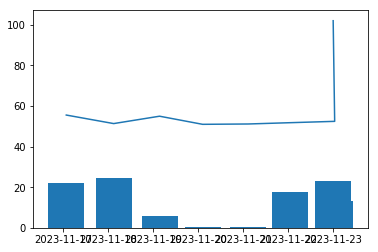

In [ ]:
plt.plot(George_SLEEP_start_select['start'],George_SLEEP_start_select['lowest_30_heartrates'])
plt.bar(George_SLEEP_start_select['start'],(George_SLEEP_start_select['activity_before_bed']/100))
plt.show()

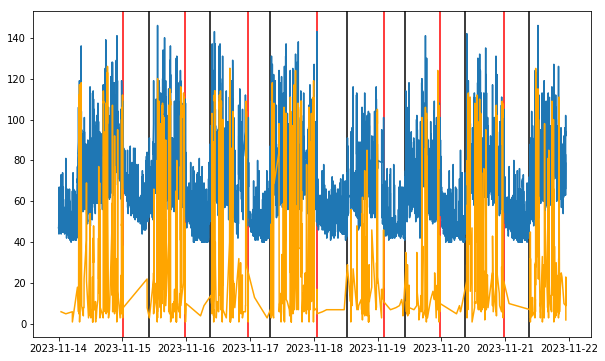

In [ ]:
#Tjielke
plt.figure(figsize=(10, 6))
for line in Tjielke_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in Tjielke_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(Tjielke_HEART_select['datetime'],Tjielke_HEART_select['heartRate'])
plt.plot(Tjielke_ACTIVITY_MINUTE_select['datetime'],Tjielke_ACTIVITY_MINUTE_select['steps'],color='orange')
plt.show()

NameError: name 'George_SLEEP_stop_select' is not defined

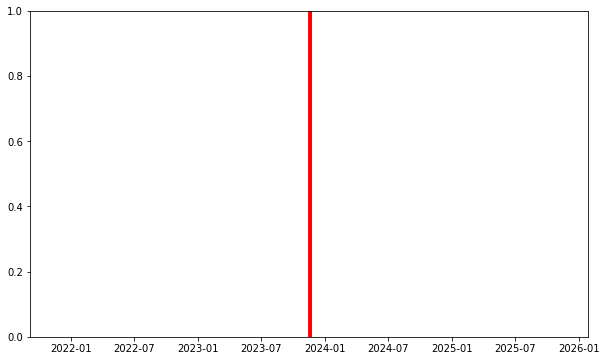

In [ ]:
#George
plt.figure(figsize=(10, 6))
for line in George_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in George_SLEEP_stop_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(George_HEART_select['datetime'],George_HEART_select['heartRate'])
plt.plot(George_ACTIVITY_MINUTE_select['datetime'],George_ACTIVITY_MINUTE_select['steps'])

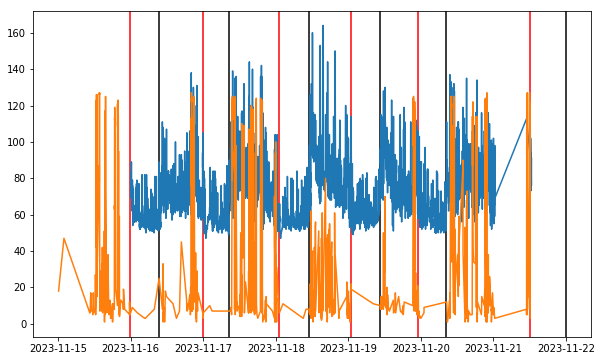

In [ ]:
#Yidan
plt.figure(figsize=(10, 6))
for line in Yidan_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in Yidan_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(Yidan_HEART_select['datetime'],Yidan_HEART_select['heartRate'])
plt.plot(Yidan_ACTIVITY_MINUTE_select['datetime'],Yidan_ACTIVITY_MINUTE_select['steps'])